# Requirements

In [1]:
# Add as many imports as you need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [2]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('climate-data.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Explore the dataset using visualizations of your choice.

In [3]:
# Write your code here. Add as many boxes as you need.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


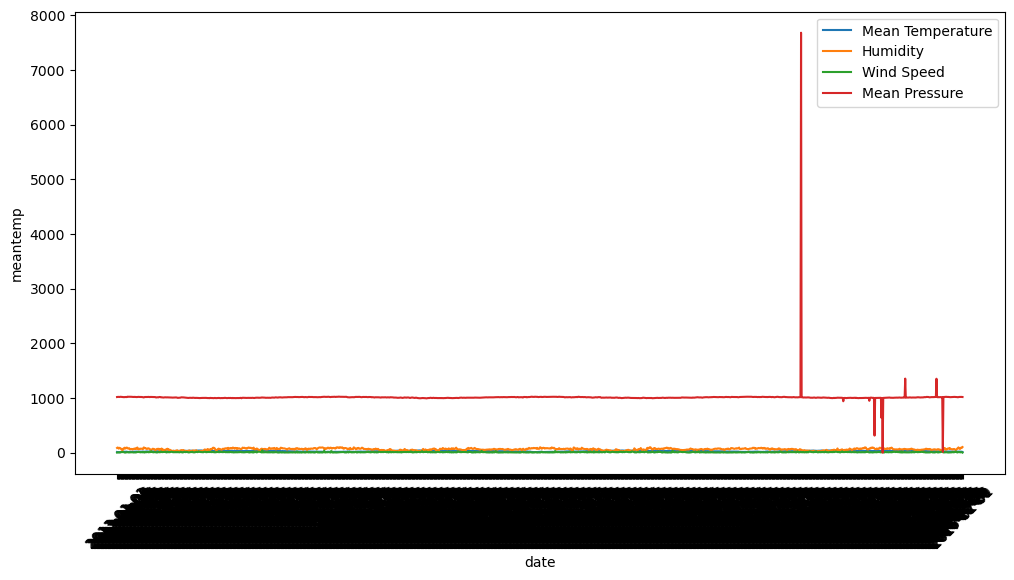

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="meantemp", label="Mean Temperature")
sns.lineplot(data=df, x="date", y="humidity", label="Humidity")
sns.lineplot(data=df, x="date", y="wind_speed", label="Wind Speed")
sns.lineplot(data=df, x="date", y="meanpressure", label="Mean Pressure")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [6]:
# Write your code here. Add as many boxes as you need.
df['date'] = pd.to_datetime(df['date'])

In [8]:
lags = 3

In [9]:
for lag in range(1, lags +1 ):
    for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
        df[f'{col}_lag{lag}'] = df[col].shift(lag)
df = df.dropna().reset_index(drop=True)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,humidity_lag1,wind_speed_lag1,meanpressure_lag1,meantemp_lag2,humidity_lag2,wind_speed_lag2,meanpressure_lag2,meantemp_lag3,humidity_lag3,wind_speed_lag3,meanpressure_lag3
0,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
1,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
3,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
4,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000


## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [10]:
# Write your code here. Add as many boxes as you need.
X = df.drop(['date', 'meantemp'], axis=1)
y = df['meantemp']

In [11]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
print(X_train.shape, X_test.shape)

(1313, 15) (146, 15)


## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [12]:
# Write your code here. Add as many boxes as you need.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
y_train = y_train.values
y_test = y_test.values

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [14]:
# Write your code here. Add as many boxes as you need.
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],3,-1))
X_test_scaled =  X_test_scaled.reshape((X_test_scaled.shape[0],3,-1))

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [15]:
# Write your code here. Add as many boxes as you need.
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_scaled.shape[1],X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

F:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [16]:
# Write your code here. Add as many boxes as you need.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [17]:
# Write your code here. Add as many boxes as you need.
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 634.9785 - mae: 23.9733 - val_loss: 720.5673 - val_mae: 25.5558
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 614.5524 - mae: 23.5557 - val_loss: 660.6605 - val_mae: 24.3824
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 513.8508 - mae: 21.3657 - val_loss: 284.6945 - val_mae: 14.9886
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 124.3385 - mae: 9.0740 - val_loss: 65.6149 - val_mae: 6.8102
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.9653 - mae: 7.3662 - val_loss: 57.3465 - val_mae: 6.1106
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 60.8012 - mae: 6.4551 - val_loss: 47.6463 - val_mae: 5.6160
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.3417 - mae: 6.0324 - val_loss: 40.1759 - val_mae: 5.1187
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.9648 - mae: 5.6256 - val_loss: 32.8722 - val_mae: 4.6224
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

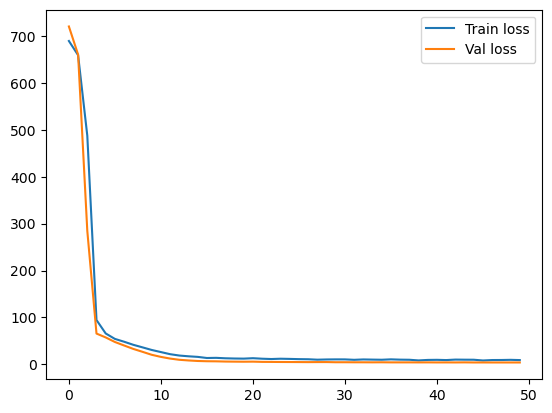

In [18]:
# Write your code here. Add as many boxes as you need.
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

Use the trained model to make predictions for the test set.

In [19]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [20]:
# Write your code here. Add as many boxes as you need.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.8651200697248587
MSE: 1.2781628192447463
R2: 0.9607479381837195


Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

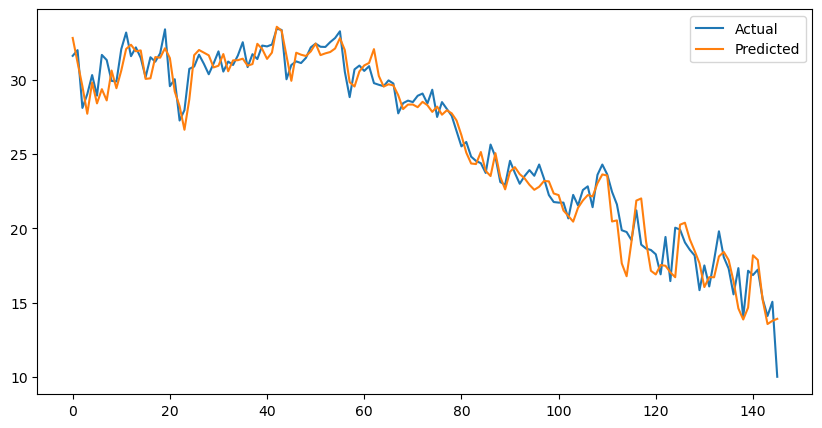

In [21]:
# Write your code here. Add as many boxes as you need.
plt.figure(figsize=(10,5))
plt.plot(y_test, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As a bonus task for this laboratory exercise, calculate the Simple Moving Average (SMA) and Weighted Moving Average (WMA) with 3 timesteps for `mean_temperature` over the past 1, 2, and 3 days:

- **SMA with 3 timesteps ($\text{SMA}_3$)** - the average of temperatures from the previous 3 days:  
  $SMA_3 = \frac{\text{mean\_temperaure}_{lag\_3} +\ \text{mean\_temperaure}_{lag\_2} +\ \text{mean\_temperaure}_{lag\_1}}{1\ +\ 1\ +\ 1}$.

- **WMA with 3 timesteps ($\text{WMA}_3$)** - a weighted average, giving more importance to recent days:  
  $WMA_3 = \frac{1\ \cdot\ \text{mean\_temperaure}_{lag\_3} +\ 2\ \cdot\ \text{mean\_temperaure}_{lag\_2} +\ 3\ \cdot\ \text{mean\_temperaure}_{lag_1}}{1\ +\ 2\ +\ 3}$.

Then use this indicators alongside the other features in the dataset to predict the `mean_temperaure`.

*Hint: Use the `rolling` method from `pandas`. Check the docs at the following link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.*

In [22]:
# Write your code here. Add as many boxes as you need.
df['SMA_3'] = df[['meantemp_lag3', 'meantemp_lag2','meantemp_lag1']].mean(axis=1)
df['WMA_3'] = (1*df['meantemp_lag3'] + 2*df['meantemp_lag2']+ 3*df['meantemp_lag3'])/6

In [23]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_lag1,humidity_lag1,wind_speed_lag1,meanpressure_lag1,meantemp_lag2,humidity_lag2,wind_speed_lag2,meanpressure_lag2,meantemp_lag3,humidity_lag3,wind_speed_lag3,meanpressure_lag3,SMA_3,WMA_3
0,2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667,8.188889,9.133333
1,2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,7.744444,7.322222
2,2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.277778,7.666667
3,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.222222,7.777778
4,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,6.666667,6.333333
